# Geopandas의 공간 연산

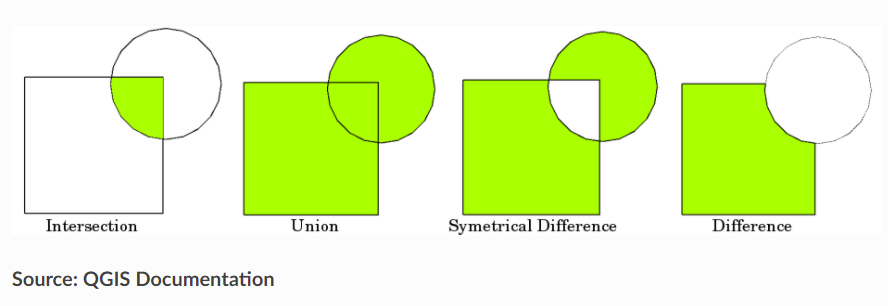

https://geopandas.org/set_operations.html

In [1]:
from shapely.geometry import Polygon
import geopandas as gpd

In [2]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                              Polygon([(2,2), (4,2), (4,4), (2,4)])])

In [3]:
polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                                  Polygon([(3,3), (5,3), (5,5), (3,5)])])

In [4]:
df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})

In [5]:
df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

## 기본 상태

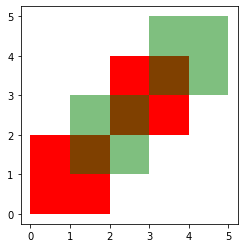

In [6]:
ax = df1.plot(color='red');
df2.plot(ax=ax, color='green', alpha=0.5);

## Union

In [8]:
res_union = gpd.overlay(df1, df2, how='union') 
res_union

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1...."
1,2.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2.0,2.0,"POLYGON ((4.00000 4.00000, 4.00000 3.00000, 3...."
3,1.0,NaN,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0...."
4,2.0,NaN,"MULTIPOLYGON (((4.00000 3.00000, 4.00000 2.000..."
5,NaN,1.0,"MULTIPOLYGON (((3.00000 2.00000, 3.00000 1.000..."
6,NaN,2.0,"POLYGON ((3.00000 5.00000, 5.00000 5.00000, 5...."


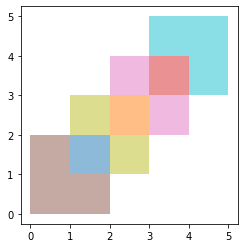

In [10]:
ax = res_union.plot(alpha=0.5, cmap='tab10')
#df1.plot(ax=ax, facecolor='none', edgecolor='k');
#df2.plot(ax=ax, facecolor='none', edgecolor='k');

## Intersection

In [11]:
res_intersection = gpd.overlay(df1, df2, how='intersection')
res_intersection

,df1,df2,geometry
0,1,1,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1...."
1,2,1,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2,2,"POLYGON ((4.00000 4.00000, 4.00000 3.00000, 3...."


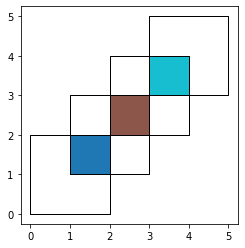

In [12]:
ax = res_intersection.plot(cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k');
df2.plot(ax=ax, facecolor='none', edgecolor='k');

## symmetric_difference

In [13]:
res_symdiff = gpd.overlay(df1, df2, how='symmetric_difference')
res_symdiff

,df1,df2,geometry
0,1.0,NaN,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0...."
1,2.0,NaN,"MULTIPOLYGON (((4.00000 3.00000, 4.00000 2.000..."
2,NaN,1.0,"MULTIPOLYGON (((3.00000 2.00000, 3.00000 1.000..."
3,NaN,2.0,"POLYGON ((3.00000 5.00000, 5.00000 5.00000, 5...."


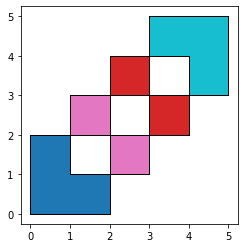

In [14]:
ax = res_symdiff.plot(cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k');
df2.plot(ax=ax, facecolor='none', edgecolor='k');

## difference

In [15]:
res_difference = gpd.overlay(df1, df2, how='difference')
res_difference

,geometry,df1
0,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....",1
1,"MULTIPOLYGON (((3.00000 3.00000, 4.00000 3.000...",2


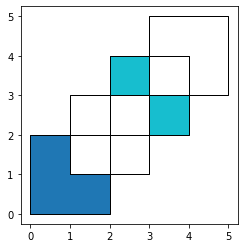

In [16]:
ax = res_difference.plot(cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k');
df2.plot(ax=ax, facecolor='none', edgecolor='k');

# Overlay Countries Example
https://geopandas.org/set_operations.html#overlay-countries-example

In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [18]:
countries = world[world['continent'] == "South America"]
countries = countries[['geometry', 'name']]

In [19]:
# Project to crs that uses meters as distance measure
countries = countries.to_crs('epsg:3395')
capitals = capitals.to_crs('epsg:3395')

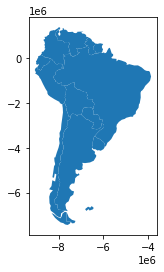

In [29]:
countries.plot();

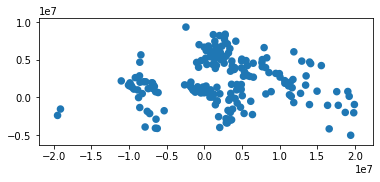

In [22]:
# make 500km buffer
capitals['geometry']= capitals.buffer(500000)
capitals.plot();

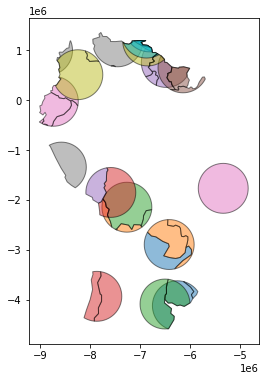

In [23]:
country_cores = gpd.overlay(countries, capitals, how='intersection')
country_cores.plot(alpha=0.5, edgecolor='k', cmap='tab10', figsize=(8,6));

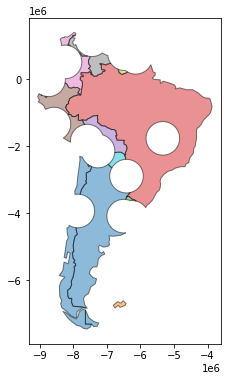

In [24]:
country_peripheries = gpd.overlay(countries, capitals, how='difference')
country_peripheries.plot(alpha=0.5, edgecolor='k', cmap='tab10', figsize=(8,6));

## 다른 참조 사이트
https://yganalyst.github.io/spatial_analysis/spatial_analysis_2/  

is_valid  


buffer(0.0001).is_valid

## Concavehull

https://alphashape.readthedocs.io/en/latest/index.html 

https://pypi.org/project/alphashape/

In [25]:
import pandas as pd
from fiona.crs import from_epsg # 좌표변환 

In [26]:
# "전국CCTV표준데이터" CSV 파일 로딩 
df_cctv = pd.read_csv('./data/전국CCTV표준데이터.csv', encoding="EUC-KR", header=0, 
                           names=['admin_nm', 'addr_rd', 'addr_jb', 'purpose', 'cctv_cnt', 'pixel', 'direction', 'period', 'date_install', 'tel', 'lat', 'lon', 'date_make', 'offer_admin_cd', 'offer_admin_nm'], 
                           dtype={'cctv_cnt':object, 'pixel':object, 'period':object, 'lat':float, 'lon':float, 'offer_admin_cd':object}, 
                  thousands = ',', #천단위 쉼표 제거   
                  index_col=None) 

In [27]:
df_cctv.dropna(subset=['lat'],axis=0,inplace=True)  # null 삭제
df_cctv.dropna(subset=['lon'],axis=0,inplace=True)  # null 삭제

In [28]:
df_cctv_sl2 = df_cctv[ df_cctv['admin_nm'].str.contains('서대문구') == True  ]

In [29]:
# 좌표 속성을 가지고 지오메트리 데이터를 생성
geom_cctv_sl01 = gpd.points_from_xy(df_cctv_sl2.lon, df_cctv_sl2.lat)

In [30]:
# 기존의 데이터프레임 컬럼명을 가져옴 
columns = df_cctv_sl2.columns

In [31]:
# 속성 데이터프레임에 Geometry를 붙여서 공간 데이터프레임을 생성 
gdf_cctv_sl01 = gpd.GeoDataFrame(df_cctv_sl2[columns], geometry=geom_cctv_sl01, crs=from_epsg(4326))

C:\Users\c167512\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [32]:
# 10% 샘플링
gdf_cctv_sl02 = gdf_cctv_sl01.sample(frac=0.1)

In [33]:
# 좌표계 변환
gdf_cctv_sl02_3857 = gdf_cctv_sl02.to_crs(epsg=3857) 

<AxesSubplot:>

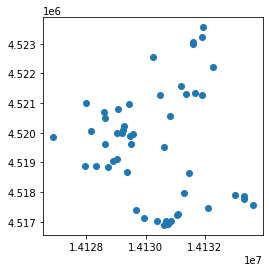

In [34]:
gdf_cctv_sl02_3857.plot() #ax=ax, color='red')

In [35]:
import alphashape   #pip install alphashape
from descartes import PolygonPatch
import matplotlib.pyplot as plt

In [36]:
# Generate the alpha shape
alpha_shape = alphashape.alphashape(gdf_cctv_sl02_3857)

In [37]:
alpha_shape

,geometry
0,"POLYGON ((14133616.498 4517565.250, 14133330.4..."


<AxesSubplot:>

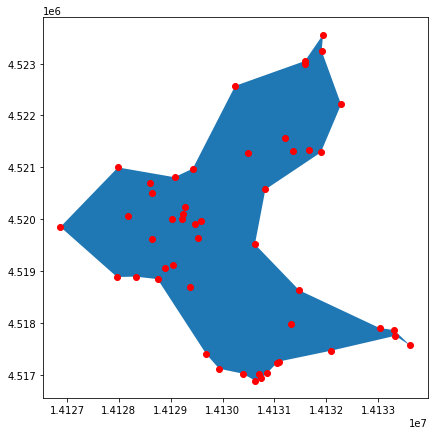

In [38]:
# Plot alpha shape
ax = alpha_shape.plot(figsize=(7,7))
gdf_cctv_sl02_3857.plot(ax=ax, color='red')

In [39]:
alpha = 0.9 * alphashape.optimizealpha(gdf_cctv_sl02_3857)
alpha

0.0009110185668528279

In [40]:
alpha_shape2 = alphashape.alphashape(gdf_cctv_sl02_3857, alpha)  
#alpha_shape2 = alphashape.alphashape(gdf_cctv_sl02_3857, 0.000802)  #0.0009(concavehull) ~ 0.0001(convexhull)

<AxesSubplot:>

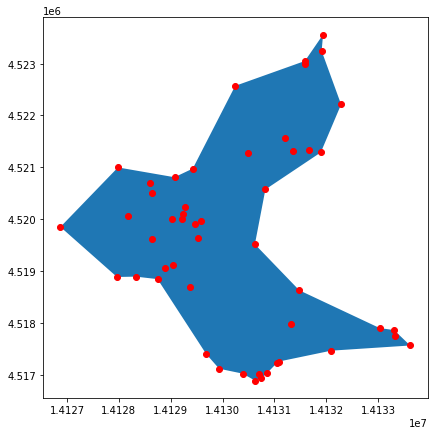

In [41]:
# Plot alpha shape
ax = alpha_shape2.plot(figsize=(7,7))
gdf_cctv_sl02_3857.plot(ax=ax, color='red')

위 결과의 경우 buffer를 약간 적용하여 최소 범위 영역을 생성 